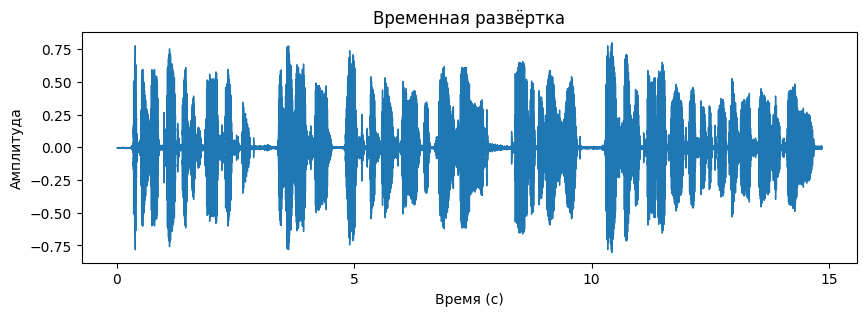

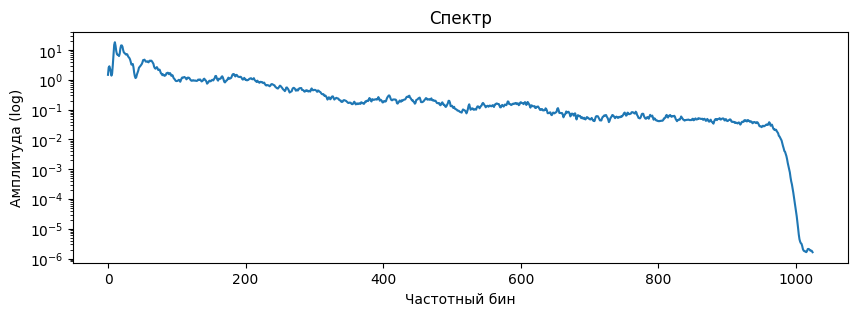

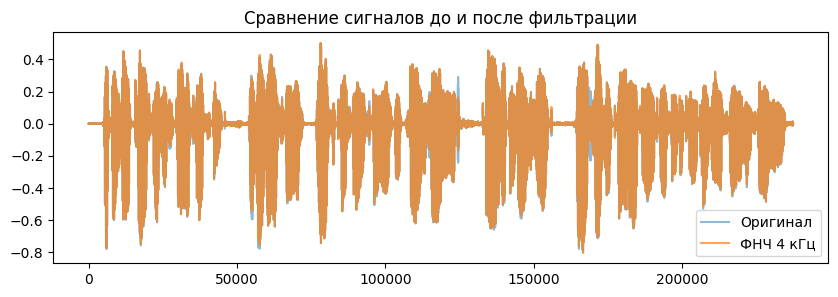

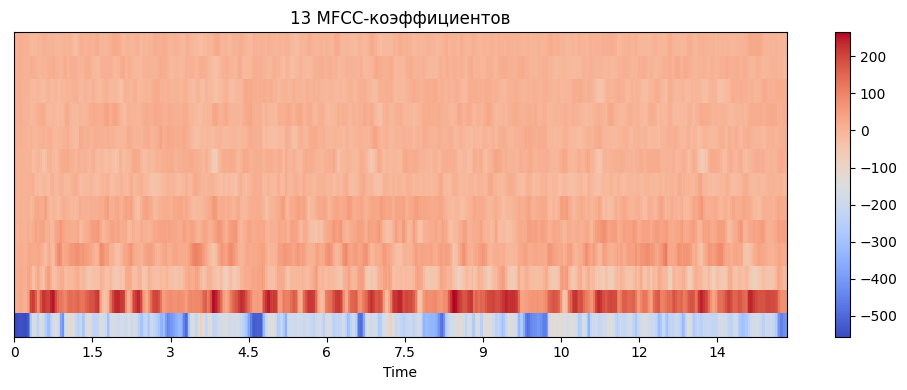

/usr/local/lib/python3.11/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1600
  warnings.warn(


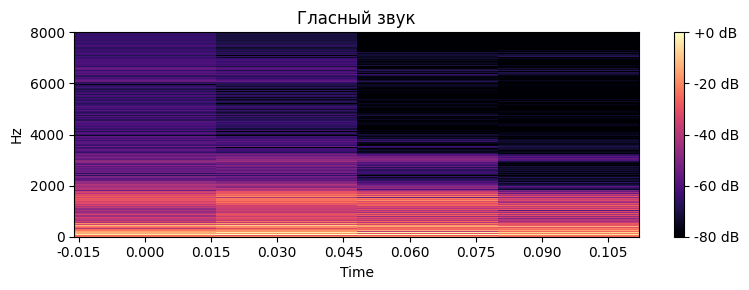

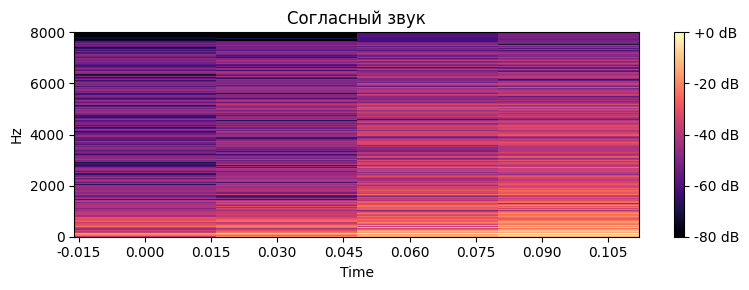

Гласный:


Согласный:


In [1]:
!pip install librosa matplotlib scipy

import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, lfilter
from IPython.display import Audio


#Загрузка аудиофайла (можно заменить путь на свой)
audio_path = librosa.example('libri1')  # или загружаемый файл
y, sr = librosa.load(audio_path, sr=16000)  # 16 кГц

#Временная развёртка
plt.figure(figsize=(10, 3))
librosa.display.waveshow(y, sr=sr)
plt.title('Временная развёртка')
plt.xlabel('Время (с)')
plt.ylabel('Амплитуда')
plt.show()

#Спектр
D = np.abs(librosa.stft(y))
plt.figure(figsize=(10, 3))
plt.semilogy(np.mean(D, axis=1))
plt.title('Спектр')
plt.xlabel('Частотный бин')
plt.ylabel('Амплитуда (log)')
plt.show()


#Задание 1: ФНЧ для подавления шума

def butter_lowpass_filter(data, cutoff, fs, order=5):
    nyq = 0.5 * fs
    norm_cutoff = cutoff / nyq
    b, a = butter(order, norm_cutoff, btype='low', analog=False)
    return lfilter(b, a, data)

#Применим ФНЧ с 4 кГц
filtered = butter_lowpass_filter(y, cutoff=4000, fs=sr)

#Сравнение
plt.figure(figsize=(10, 3))
plt.plot(y, alpha=0.5, label='Оригинал')
plt.plot(filtered, alpha=0.7, label='ФНЧ 4 кГц')
plt.legend()
plt.title('Сравнение сигналов до и после фильтрации')
plt.show()

Audio(filtered, rate=sr)

#Задание 2: MFCC

mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
plt.figure(figsize=(10, 4))
librosa.display.specshow(mfccs, sr=sr, x_axis='time')
plt.colorbar()
plt.title('13 MFCC-коэффициентов')
plt.tight_layout()
plt.show()

#Задание 3: Анализ гласного и согласного

#Предположим, выделим фрагмент с гласным и согласным (ручной выбор по времени)
vowel = y[int(0.5*sr):int(0.6*sr)]    # гласный
consonant = y[int(0.2*sr):int(0.3*sr)] # согласный

def plot_spectrum(signal, sr, title):
    D = librosa.amplitude_to_db(np.abs(librosa.stft(signal)), ref=np.max)
    plt.figure(figsize=(8, 3))
    librosa.display.specshow(D, sr=sr, x_axis='time', y_axis='linear')
    plt.colorbar(format='%+2.0f dB')
    plt.title(title)
    plt.tight_layout()
    plt.show()

plot_spectrum(vowel, sr, 'Гласный звук')
plot_spectrum(consonant, sr, 'Согласный звук')

#Прослушивание
print("Гласный:")
display(Audio(vowel, rate=sr))
print("Согласный:")
display(Audio(consonant, rate=sr))
